 #Wall Clock Runtime Analysis (K-Sensitive Callstrings)
 Here we analyze the performance of our K-sensitive callstring table generation on the TA2 suite of binaries.
 We have omitted the tree generation from this analysis primarily due to the lack of a "main" function to pass as to root the table.
 ##Data
 Here we have the recorded times, in seconds, of runs over each of the articles.
 The outer list is indexed by K=1-10, and the inner by binary.

In [11]:
runs = [[3.77,1.36,1.1,1.09,1.05,1.37,23.54,1.12,1.42,1.22,1.41,1.45,1.2,1.43,1.14,6.69,6.81,1.15,1.14,1.46,6.77,1.47,1.15,1.18,1.1,1.53],[4.05,1.44,1.18,1.15,1.13,1.47,24.98,1.18,1.45,1.22,1.45,1.47,1.21,1.46,1.14,6.77,6.89,1.15,1.15,1.51,6.82,1.47,1.14,1.21,1.14,1.55],[4.09,1.45,1.19,1.16,1.17,1.47,25.05,1.15,1.46,1.24,1.45,1.49,1.23,1.45,1.15,6.8,6.89,1.15,1.16,1.48,6.88,1.48,1.16,1.2,1.14,1.55],[4.13,1.46,1.18,1.15,1.13,1.48,25.72,1.18,1.45,1.22,1.45,1.47,1.23,1.45,1.16,7.06,6.96,1.15,1.15,1.66,7.1,1.48,1.25,1.22,1.24,1.57],[4.1,1.5,1.21,1.17,1.14,1.47,26.09,1.27,1.46,1.25,1.46,1.48,1.24,1.48,1.17,7.49,7.24,1.17,1.19,1.5,7.59,1.49,1.17,1.22,1.26,1.57],[4.13,1.58,1.2,1.17,1.23,1.48,27.32,1.2,1.5,1.27,1.56,1.5,1.35,1.51,1.27,8.71,7.04,1.17,1.16,1.49,8.79,1.5,1.2,1.25,1.18,1.61],[4.24,1.55,1.26,1.23,1.22,1.51,28.79,1.24,1.54,1.3,1.53,1.55,1.29,1.54,1.22,11.41,7.14,1.21,1.22,1.57,11.58,1.55,1.22,1.28,1.2,1.64],[4.22,1.61,1.31,1.28,1.25,1.51,30.59,1.3,1.6,1.37,1.61,1.62,1.37,1.62,1.27,18.4,7.18,1.29,1.27,1.63,18.83,1.62,1.28,1.34,1.26,1.72],[4.22,1.77,1.43,1.4,1.37,1.49,35.0,1.42,1.76,1.5,1.76,1.8,1.49,1.77,1.41,37.03,7.21,1.38,1.38,1.75,35.73,1.73,1.37,1.43,1.36,1.84],[4.24,2.05,1.77,1.66,1.63,1.49,42.88,1.67,2.05,1.78,2.05,2.06,1.78,2.06,1.86,81.64,7.02,1.67,1.75,2.07,82.13,2.04,1.85,1.68,1.61,2.24]]

In [4]:
bins = [1241,1306,1314,2182,279,3727,387,3909,3916,4538,5073,5138,5412,5581,5620,7427,7455,7533,7670,7694,8168,8246,9477,973,9749,9991]

Here, we have the list of Article indexes in the order they were used. This is currently unused in the analysis, but is preserved in the notebook in case we want to look at performance on particular articles.

##Summary Statistics
Summary statistics are provided here because they were explicitly asked for:

In [6]:
minsByK = map minimum runs
minsByK

[1.05,1.13,1.14,1.13,1.14,1.16,1.2,1.25,1.36,1.49]

In [7]:
maxesByK = map maximum runs
maxesByK

[23.54,24.98,25.05,25.72,26.09,27.32,28.79,30.59,37.03,82.13]

In [8]:
avg run = (sum run) / (fromIntegral $ length run)
avgsByK = map avg runs
avgsByK

[2.850769230769231,2.9530769230769227,2.9649999999999994,3.0269230769230764,3.091538461538462,3.245,3.5396153846153835,4.2057692307692305,5.838461538461539,9.87423076923077]

##Histograms
Another possibly useful representation of this data is as a histogram of performance across different Ks.
### General Histogram (K=1..5)

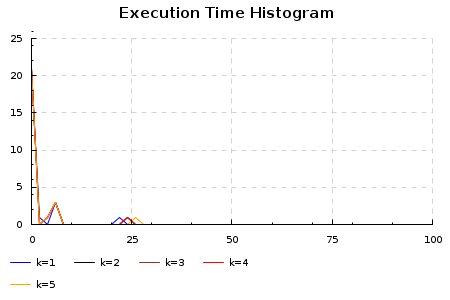

In [43]:
import Graphics.Rendering.Chart 
import Data.Default.Class
import Control.Lens

colors = [blue, black, brown, red, orange] ++ repeat green

estimatePDF run k = toPlot
  $ plot_lines_values .~ [zip rawBins counts]
  $ plot_lines_style  . line_color .~ (map opaque colors) !! (k - 1)
  $ plot_lines_title  .~ "k=" ++ show k
  $ def
  where rawBins = [0,2..100]
        bins    = zip `ap` tail $ rawBins
        counts :: [Int]
        counts  = map (\(l, h) -> length $ filter (\x -> (l <= x) && (x <= h)) run) bins

plots = zipWith estimatePDF runs [1..]

toRenderable $ layout_title .~ "Execution Time Histogram"
             $ layout_plots .~ take 5 plots
             $ def

Here, we see that the K value seems to have some, but minor effect on runtime in these cases.
However, the histogram also demonstrates 3 "classes" of programs.
Some terminate nearly immediately, some are fast, but noticeable in time, and some are hypercomplex.
###Wide K Histogram

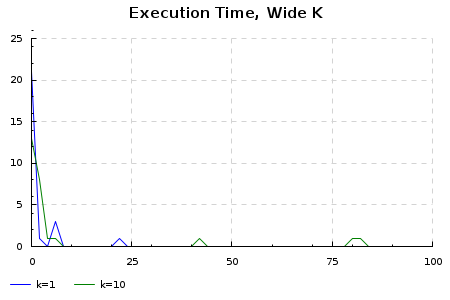

In [44]:
toRenderable $ layout_title .~ "Execution Time, Wide K"
             $ layout_plots .~ [head plots, last plots]
             $ def

Here, we run the same trial only looking at k=1 and k=10.
We can see that the K-value now has much more effect on the execution time, but only on the medium and hard difficulty problems.